#Tugas Berita Online

In [ ]:
#melakukan web scraping pada halaman berita yang berasal dari URL
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3799593/ari-lesmana-fourtwnty-ambil-bagian-di-film-budi-pekerti"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")


Film menurutku salah satu hal yang menyenangkanJakarta (ANTARA) - Salah satu anggota dari grup Fourtwnty, Ari Lesmana, ambil bagian di film “Budi Pekerti” garapan sutradara Wregas Bhanuteja sebagai salah satu pemeran pendukung di dalamnya.
“Ditawarin, ini menarik.
Jadi mau,” kata Ari saat ditemui dalam acara penayangan perdana film “Budi Pekerti” di Plaza Senayan, Jakarta Pusat, Senin.
Alasan Ari bersedia memerankan karakter Tunas untuk film ini sederhana.
Ia sudah mengetahui karya-karya film Wregas sebelumnya, dan penggambaran karakter Tunas yang menarik membuatnya mau untuk bergabung dalam film ini.
Baca juga: Sutradara "Budi Pekerti" ungkap tawaran dari Brazil dan Mesir

Di film “Budi Pekerti”, Ari berperan sebagai Tunas, yakni tim redaksi dari media Gaung yang menjadi pemantik dari alur penceritaan di dalamnya.
Proyek film keduanya ini membuat Ari senang karena dapat mengeksplorasi lagi pengalamannya sebagai aktor dan juga musisi.
“Beda-beda.
Ada sesuatu yang nggak aku dapatkan di

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#menghitung dan mencetak nilai TF-IDF (Term Frequency-Inverse Document Frequency)
#untuk setiap kata dalam setiap kalimat dari teks yang telah di-tokenisasi sebelumnya.
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
Film menurutku salah satu hal yang menyenangkanJakarta (ANTARA) - Salah satu anggota dari grup Fourtwnty, Ari Lesmana, ambil bagian di film “Budi Pekerti” garapan sutradara Wregas Bhanuteja sebagai salah satu pemeran pendukung di dalamnya.
ambil: 0.1830
anggota: 0.1830
antara: 0.1609
ari: 0.1009
bagian: 0.1830
bhanuteja: 0.1830
budi: 0.1073
dalamnya: 0.1609
dari: 0.1609
di: 0.2018
film: 0.1535
fourtwnty: 0.1452
garapan: 0.1830
grup: 0.1452
hal: 0.1609
lesmana: 0.1609
menurutku: 0.1609
menyenangkanjakarta: 0.1830
pekerti: 0.1073
pemeran: 0.1830
pendukung: 0.1830
salah: 0.4356
satu: 0.3990
sebagai: 0.1452
sutradara: 0.1609
wregas: 0.1609
yang: 0.1230

Kalimat 2: “Ditawarin, ini menarik.
ditawarin: 0.6705
ini: 0.4507
menarik: 0.5894

Kalimat 3: Jadi mau,” kata Ari saat ditemui dalam acara penayangan perdana film “Budi Pekerti” di Plaza Senayan, Jakarta Pusat, Senin.
acara: 0.2634
ari: 0.1452
budi: 0.1544
dalam: 0.2315
di: 0.1452
ditemui: 0.2634
film: 0.1104
jadi: 0.2634
jakart

In [ ]:
#menghitung kemiripan kosinus (cosine similarity) antara dua kalimat berdasarkan vektor representasi TF-IDF dari masing-masing kalimat.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0000


In [ ]:
#menghitung dan mencetak kemiripan kosinus (cosine similarity) antara semua pasangan kalimat dalam teks yang telah di-tokenisasi

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0940
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0450
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0830
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.2736
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0666
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.1243
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.4716
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.3302
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0829
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0211
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0310
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0756
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.0912
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.0838
Cosine Similarity anta

In [ ]:
#membuat dan mencetak DataFrame menggunakan hasil perhitungan cosine similarity antara semua pasangan kalimat dalam teks yang telah di-tokenisasi dan matriks TF-IDF
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16,Kalimat 17,Kalimat 18,Kalimat 19,Kalimat 20
Kalimat 1,1.000000,0.000000,0.094045,0.045017,0.082961,0.273558,0.066594,0.0,0.124270,0.000000,0.471625,0.330173,0.082900,0.021122,0.031028,0.075570,0.091234,0.083811,0.059674,0.103379
Kalimat 2,0.000000,1.000000,0.000000,0.113646,0.192994,0.000000,0.085789,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069149,0.000000
Kalimat 3,0.094045,0.000000,1.000000,0.047391,0.117443,0.118334,0.035775,0.0,0.132125,0.000000,0.020504,0.138220,0.058186,0.030389,0.068538,0.000000,0.093030,0.085460,0.028836,0.090082
Kalimat 4,0.045017,0.113646,0.047391,1.000000,0.262614,0.075897,0.098958,0.0,0.052597,0.000000,0.029206,0.029663,0.000000,0.043287,0.000000,0.000000,0.019965,0.018341,0.079764,0.026135
Kalimat 5,0.082961,0.192994,0.117443,0.262614,1.000000,0.080832,0.083570,0.0,0.055212,0.040847,0.083623,0.037176,0.000000,0.000000,0.000000,0.000000,0.057164,0.022986,0.067361,0.032754
Kalimat 6,0.273558,0.000000,0.118334,0.075897,0.080832,1.000000,0.107918,0.0,0.114493,0.000000,0.050703,0.224562,0.000000,0.021054,0.030929,0.000000,0.144148,0.109499,0.070977,0.195744
Kalimat 7,0.066594,0.085789,0.035775,0.098958,0.083570,0.107918,1.000000,0.0,0.083400,0.000000,0.022047,0.105190,0.093692,0.032676,0.000000,0.058454,0.099034,0.013845,0.089418,0.078951
Kalimat 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 9,0.124270,0.000000,0.132125,0.052597,0.055212,0.114493,0.083400,0.0,1.000000,0.000000,0.181194,0.102966,0.044123,0.103563,0.203425,0.000000,0.115998,0.063663,0.032003,0.020363
Kalimat 10,0.000000,0.000000,0.000000,0.000000,0.040847,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


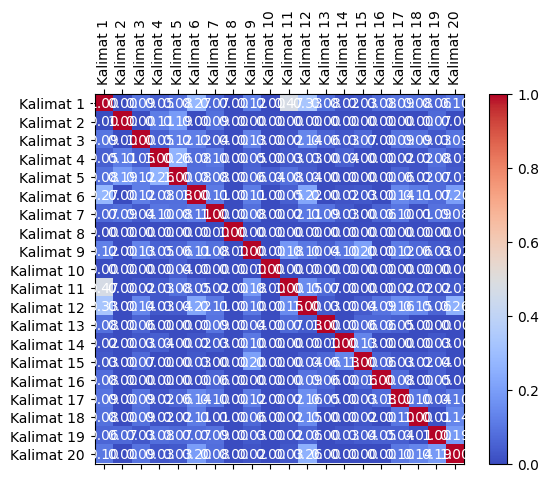

In [ ]:
#membuat dan menampilkan grafik matriks yang menggambarkan cosine similarity antara semua pasangan kalimat dalam teks yang telah di-tokenisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [ ]:
#membangun sebuah graf yang merepresentasikan hubungan antara kalimat dalam teks berdasarkan kemiripan (similarity) antara kalimat-kalimat tersebut.
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
Film menurutku salah satu hal yang menyenangkanJakarta (ANTARA) - Salah satu anggota dari grup Fourtwnty, Ari Lesmana, ambil bagian di film “Budi Pekerti” garapan sutradara Wregas Bhanuteja sebagai salah satu pemeran pendukung di dalamnya.: 14.7077
Closeness Centrality of “Ditawarin, ini menarik.: 8.8977
Closeness Centrality of Jadi mau,” kata Ari saat ditemui dalam acara penayangan perdana film “Budi Pekerti” di Plaza Senayan, Jakarta Pusat, Senin.: 17.0248
Closeness Centrality of Alasan Ari bersedia memerankan karakter Tunas untuk film ini sederhana.: 20.4028
Closeness Centrality of Ia sudah mengetahui karya-karya film Wregas sebelumnya, dan penggambaran karakter Tunas yang menarik membuatnya mau untuk bergabung dalam film ini.: 17.3705
Closeness Centrality of Baca juga: Sutradara "Budi Pekerti" ungkap tawaran dari Brazil dan Mesir

Di film “Budi Pekerti”, Ari berperan sebagai Tunas, yakni tim redaksi dari media Gaung yang menjadi pemantik dari alur pencerita

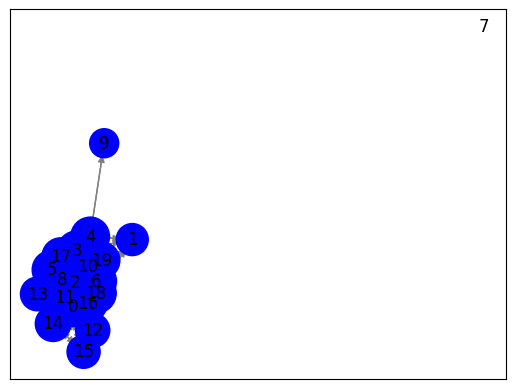

Closeness Centrality:
Node 0: 0.8526
Node 1: 0.5329
Node 2: 0.8120
Node 3: 0.7751
Node 4: 0.7751
Node 5: 0.7751
Node 6: 0.8526
Node 7: 0.0000
Node 8: 0.8120
Node 9: 0.4372
Node 10: 0.7414
Node 11: 0.8120
Node 12: 0.6090
Node 13: 0.5880
Node 14: 0.6559
Node 15: 0.5684
Node 16: 0.8120
Node 17: 0.7414
Node 18: 0.8526
Node 19: 0.7105


In [ ]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")


In [ ]:

import networkx as nx
import pandas as pd

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G)

# Urutkan closeness centrality dari yang tertinggi ke terendah
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Ambil 3 kalimat penting teratas
top_3_closeness = sorted_closeness[:3]

# Buat DataFrame dari kalimat-kalimat penting
data = {
    "Peringkat": [rank + 1 for rank, _ in enumerate(top_3_closeness)],
    "Kalimat": [sentence for sentence, _ in top_3_closeness],
    "Closeness Centrality": [centrality for _, centrality in top_3_closeness]
}

df_closeness = pd.DataFrame(data)

# Tampilkan DataFrame
print("3 Kalimat Penting Berdasarkan Closeness Centrality:")
df_closeness

3 Kalimat Penting Berdasarkan Closeness Centrality:


,Peringkat,Kalimat,Closeness Centrality
0,1,\nFilm menurutku salah satu hal yang menyenang...,0.852632
1,2,Proyek film keduanya ini membuat Ari senang ka...,0.852632
2,3,Film ini dibintangi oleh deretan bintang Tanah...,0.852632


In [ ]:
import networkx as nx
import pandas as pd

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung PageRank untuk setiap simpul
pagerank = nx.pagerank(G)

# Urutkan PageRank dari yang tertinggi ke terendah
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Ambil 3 kalimat penting teratas
top_3_pagerank = sorted_pagerank[:3]

# Buat DataFrame dari kalimat-kalimat penting
data = {
    "Peringkat": [rank + 1 for rank, _ in enumerate(top_3_pagerank)],
    "Kalimat": [sentence for sentence, _ in top_3_pagerank],
    "PageRank Score": [score for _, score in top_3_pagerank]
}

df_pagerank = pd.DataFrame(data)

# Tampilkan DataFrame
print("3 Kalimat Penting Berdasarkan PageRank:")
df_pagerank


3 Kalimat Penting Berdasarkan PageRank:


,Peringkat,Kalimat,PageRank Score
0,1,\nFilm menurutku salah satu hal yang menyenang...,0.093584
1,2,"Baca juga: Film ""Budi Pekerti"" dapat respons p...",0.087591
2,3,"Baca juga: Sutradara ""Budi Pekerti"" ungkap taw...",0.075533
